# Notebook 2: Logistic regression

This notebook will train the user data on spotify using the Logistic regression model. To get a better understanding of what the data looks like, refer to *Notebook 1*.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import linear_model

In [3]:
data = pd.read_csv('processed_data.csv')

In [4]:
cols = list(data.columns)

In [5]:
cols

['Unnamed: 0',
 'duration_ms',
 'key',
 'loudness',
 'tempo',
 'acousticness',
 'danceability',
 'instrumentalness',
 'liveness',
 'mode',
 'speechiness',
 'valence',
 'target']

The columns `Unnamed 0` and `target` are not needed 

In [6]:
cols.pop(0)
cols.remove('target')

In [7]:
X = data[cols]
y = data['target']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [9]:
model = linear_model.LogisticRegression()

train the model

In [10]:
model.fit(X_train, y_train)

LogisticRegression()

Compute outputs for test set

In [11]:
y_pred = model.predict(X_test)

Compute precision fot test set

In [12]:
precision = model.score(X_test, y_test)

In [13]:
precision*100

68.31683168316832

For classification tasks, it is important to also consider the precision, recall, and evetually draw the confusion matrix for the given results

In [14]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual User preference'], colnames=['Model prediction'])

<AxesSubplot:xlabel='Model prediction', ylabel='Actual User preference'>

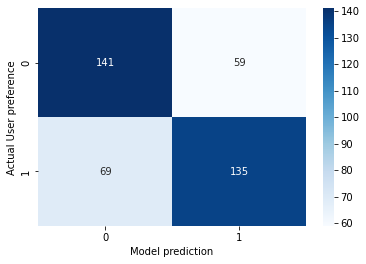

In [15]:
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='d')

**Reminder**: The confusion matrix contains the following values

$$\begin{bmatrix} True Negatives & False Positives \\ False Negatives & True Negatives \end{bmatrix}$$

Notice how the number for **False Negativs** is high, meaning that the *model is flagging tracks as unlikable when the user actually liked them*.

$$
Precision = \frac{TP}{TP + FP}
$$

$$
Recall = \frac{TP}{TP + FN}
$$

$$
F_1 = \frac{2TP}{2TP + FP + FN}
$$

Compute the F1-score relative to the first class `0`.

In [17]:
TP, FP = confusion_matrix[0]
FN, TN = confusion_matrix[1]

In [18]:
precision = TP / (TP + FP)
recall = TP / (TP + FN)
F1 = 2*TP / (2*TP + FP + FN)

In [19]:
print("Precision = {:.2f}\nRecall = {:.2f}\nF1 = {:.2f}".format(precision, recall, F1))

Precision = 0.62
Recall = 0.60
F1 = 0.61


In order to achieve standardised results for a better comparaison between the different algorithms, we'll be using the `classification_report` function provided in `sklearn.metrics`.

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.70      0.69       200
           1       0.70      0.66      0.68       204

    accuracy                           0.68       404
   macro avg       0.68      0.68      0.68       404
weighted avg       0.68      0.68      0.68       404

